# KNN Nearest Neighbors com Python

O Scikit-learn é uma biblioteca de aprendizado de máquina muito popular para Python. Neste kernel, vamos usá-lo para criar um modelo de aprendizado de máquina usando o algoritmo k-Nearest Neighbours para prever se os pacientes no "Pima Indians Diabetes Dataset" têm diabetes ou não.


 <img src='diabetes.jpg' /></a>



Este dataset **"diabetes.csv"** possui informações dispostas em colunas sobre os exames dos pacientes para idicação de diabetes:

* **Pregnancies**:  Número de gravidez da paciente.
* **Glucose**:  Taxa de glicose.
* **BloodPressure**:  Presssão sanguínea.
* **SkinThickness**:  Espessura da pele.
* **Insulin**:  Quantidade de insulina no sangue.
* **BMI**: Índice de Massa Corporal.
* **DiabetesPedigreeFunction**: Função que representa a probabilidade de contrair a doença extrapolando da história de seus ancestrais.
* **Age**: Idade do paciente.
* **Outcome**: Resultado, 0-negativo e 1-positivo.






## Importar bibliotecas



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Obter os dados

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Normalizar as variáveis

Como o classificador KNN prediz a classe de uma determinada observação de teste, identificando as observações mais próximas a ela, a escala das variáveis é importante. Quaisquer variáveis que estão em escala grande terão um efeito muito maior na distância entre as observações e, portanto, no classificador KNN, do que as variáveis que estão em escala pequena.

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('Outcome',axis=1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(df.drop('Outcome',axis=1))

In [9]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


## Train Test Split

Vamos dividir os dados aleatoriamente em conjunto de treinamento e teste.

Ajustaremos / treinaremos um classificador no conjunto de treinamento e faremos previsões no conjunto de teste. Em seguida, compararemos as previsões com os rótulos conhecidos.

O Scikit-learn fornece facilidade para dividir dados em conjunto de treinamento e teste usando o método train_test_split.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Outcome'],
                                                    test_size=0.30)

## Usando o KNN

Lembre-se de que estamos tentando criar um modelo para prever se alguém irá ou não atingir a CLASSE ALVO. Começaremos com k = 1.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
pred = knn.predict(X_test)


## Previsões e avaliações

Vamos avaliar o nosso modelo KNN!

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,pred))

[[117  31]
 [ 32  51]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       148
           1       0.62      0.61      0.62        83

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231




## Escolhendo o valor de K

Vamos em frente e use o método cotovelo para escolher um bom valor de K:

In [19]:
error_rate = []

for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

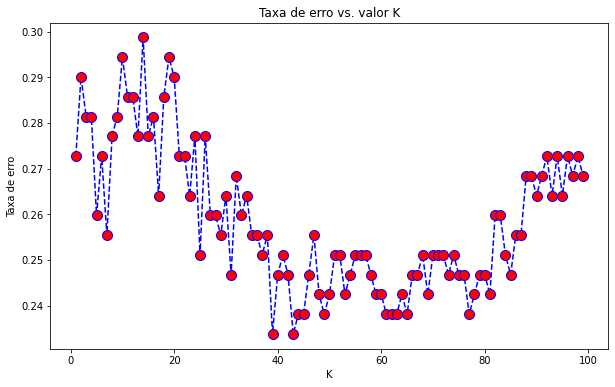

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Taxa de erro vs. valor K')
plt.xlabel('K')
plt.ylabel('Taxa de erro')
plt.show()

Aqui podemos ver que, depois de K> 40, a taxa de erro tende a ficar mais estável. Vamos treinar novamente o modelo e comparar como os resultados.

In [21]:
# PRIMEIRA COMPARAÇÃO COM K = 1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

K=1


[[117  31]
 [ 32  51]]


              precision    recall  f1-score   support

           0       0.79      0.79      0.79       148
           1       0.62      0.61      0.62        83

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



In [22]:
# AGORA COM K=40
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('K={}'.format(knn))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

K=KNeighborsClassifier(n_neighbors=40)


[[135  13]
 [ 44  39]]


              precision    recall  f1-score   support

           0       0.75      0.91      0.83       148
           1       0.75      0.47      0.58        83

    accuracy                           0.75       231
   macro avg       0.75      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231



# Bom trabalho!
Conseguimos extrair um pouco mais de desempenho do nosso modelo, ajustando para um valor K melhor!